In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,MaxPooling2D,Conv2D
import random
import numpy as np
import matplotlib.pyplot as plt



In [47]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter=',')


X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [48]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0 # Rescalling the values 
X_test = X_test/255.0# Originally they were raging from 0 - 255(RGB values), now they range from 0 to 1
#Checking the size of each image
#X_train[1, :]

In [49]:
print(f"Shape of X_train: { X_train.shape}")
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


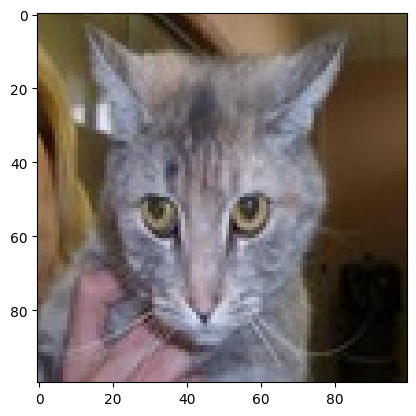

In [50]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [51]:
#Layers
model = Sequential([
Conv2D(32, (3,3), activation='relu', input_shape = (100, 100, 3)),#32 filters

Conv2D(32, (3,3), activation='relu'), 
MaxPooling2D((2,2)),   

Flatten(),
Dense(64, activation= 'relu'),
Dense(1, activation= 'sigmoid')
])   

C:\Users\John\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
#METHOD 2 OF CREATING LAYERS
# model = Sequential
# model.add(Conv2D(32, (3,3)), activation  = 'relu', input_shape = (100,100,3)),

# model.add(Conv2D(32, (3,3)), activation  = 'relu'),
# model.add(MaxPooling2D((2,2))),

# model.add(Flatten())
# model.add(Dense(64, activation= 'relu'))
# model.add(Dense(1, activation= 'sigmoid'))

In [53]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics= ['accuracy'])
model.fit(X_train, Y_train, epochs= 5, batch_size= 64)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.4961 - loss: 1.0126
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5371 - loss: 0.6875
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5901 - loss: 0.6815
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.6793 - loss: 0.6117
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7631 - loss: 0.5033


In [54]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 52s 306ms/step - accuracy: 0.7196 - loss: 0.5463


[0.6354949474334717, 0.6650000214576721]

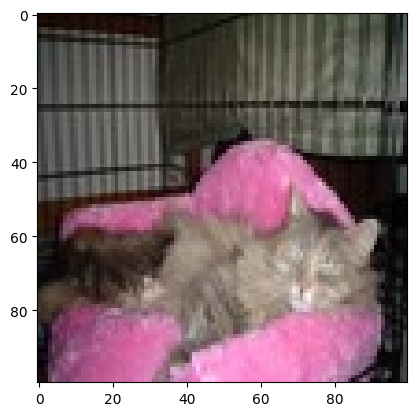

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
cat
[[0.6510197]]


In [162]:
index2 = random.randint(0, len(Y_test))
plt.imshow(X_test[index2, :])
plt.show()

y_pred =model.predict(X_test[index2, :].reshape(1,100,100,3))
if y_pred  > 0.5:
    print('cat')
else:
    print('dog')


print(y_pred)